# Questão 1

In [66]:
from scipy.integrate import quad
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt

T=2.725
H_0=60/3.086e19 #em segundos
omega_rad=(32*sc.pi*sc.G*sc.sigma*(T**4))/(3*((H_0)**2)*(sc.c**3))
print(omega_rad)
omega_m=0.3
omega_l=0.6
omega_k=1-omega_rad-omega_l-omega_m

# Letra b:
def idade_universo_int(z):
    materia=omega_m*((1+z)**3)
    radiacao=omega_rad*((1+z)**4)
    energia_escura=(omega_l/512)*(((2+z)**9)/((1+z)**6))
    curvatura=omega_k*((1+z)**2)
    Ez=np.sqrt(materia+radiacao+energia_escura+curvatura)
    return 1/((1+z)*Ez)

idade=(1/H_0)*(quad(idade_universo_int, 0, np.inf))[0] #em segundos
idade_ganos=idade/(3600*24*365*1e9) # em giganos
print(f"Letra (B): Este universo tem {idade_ganos:.2f} Ganos em z=0")

# Letra c:

def distancia_comovel_int(z):
    materia=omega_m*((1+z)**3)
    radiacao=omega_rad*((1+z)**4)
    energia_escura=(omega_l/512)*(((2+z)**9)/((1+z)**6))
    curvatura=omega_k*((1+z)**2)
    Ez=np.sqrt(materia+radiacao+energia_escura+curvatura)
    return 1/Ez

distancia_comovel=(sc.c/H_0)*quad(distancia_comovel_int, 0, 16)[0] #em metros
#Seguindo a referência do Capellini:
if(omega_k == 0): distancia_comovel = distancia_comovel #distancia comóvel segue inalterada
elif(omega_k > 0): distancia_comovel = (sc.c/H_0)*(1/np.sqrt(omega_k))*np.sinh(np.sqrt(omega_k)*(distancia_comovel/(sc.c/H_0)))
else: distancia_comovel = (sc.c/H_0)*(1/np.sqrt(abs(omega_k)))*np.sin(np.sqrt(abs(omega_k))*(distancia_comovel/(sc.c/H_0)))
diametro_angular=distancia_comovel/(1+16) #em metros, onde z=16
resol_telesco=0.05*(sc.pi/(180*3600)) #em radianos
print(resol_telesco)
# Como resol_telesco << 1 radiano, podemos usar R=alpha*d_A, logo:
tam_fisico=resol_telesco*diametro_angular/3.08e16 #em parsec
print(f"Letra (C): O tamanho físico que podemos resolver com este telescópio é {tam_fisico:.5f} parsec em z=16")

# Letra d:

idade=(1/H_0)*(quad(idade_universo_int, 16, np.inf))[0] #em segundos
idade_ganos=idade/(3600*24*365*1e9) # em giganos
print(f"Letra (D): Este universo tem {idade_ganos:.3f} Ganos em z=16")

# Letra e:

distancia_comovel=(sc.c/H_0)*quad(distancia_comovel_int, -1, np.inf)[0] #em metros
distancia_horizonte=distancia_comovel/3.086e25
print(f"Letra (E): A distância horizonte é {distancia_horizonte:.3f} Gpc")



6.865771047627315e-05
Letra (B): Este universo tem 15.73 Ganos em z=0
2.42406840554768e-07
Letra (C): O tamanho físico que podemos resolver com este telescópio é 187.34867 parsec em z=16
Letra (D): Este universo tem 0.279 Ganos em z=16
Letra (E): A distância horizonte é 18.781 Gpc


/tmp/ipykernel_567849/2718500576.py:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  for i in z: idade.append((1/H_0)*(quad(idade_universo_int, i, np.inf))[0])
/tmp/ipykernel_567849/2718500576.py:4: RuntimeWarning: divide by zero encountered in divide
  def pho_de (z): return (omega_l/512)*(((2+z)**9)/((1+z)**6))


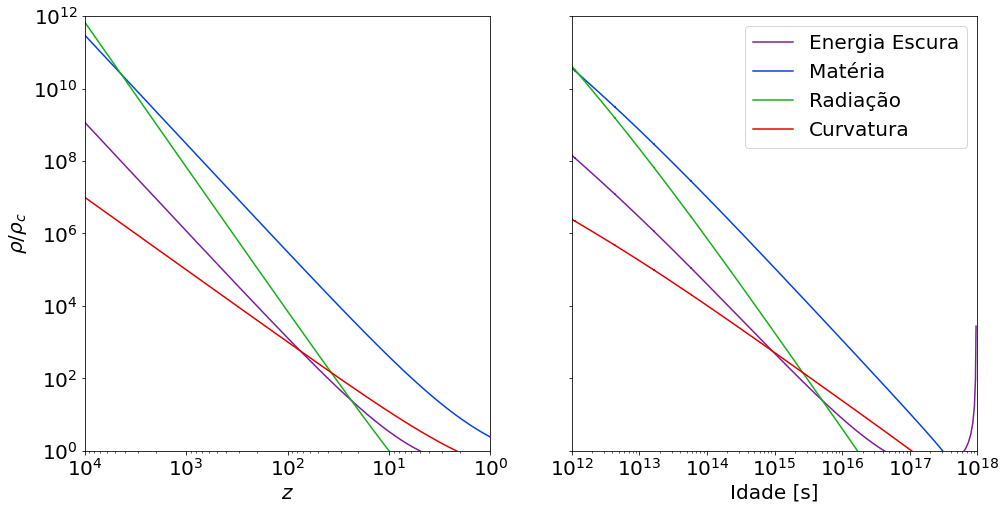

In [3]:
# Letra f:

z=np.arange(-1, 1e5, 0.1)
def pho_de (z): return (omega_l/512)*(((2+z)**9)/((1+z)**6))
def pho_m (z): return omega_m*((1+z)**3)
def pho_rad (z): return omega_rad*((1+z)**4)
def pho_curv (z): return omega_k*((1+z)**2)
idade=[]
for i in z: idade.append((1/H_0)*(quad(idade_universo_int, i, np.inf))[0])

fig, axs = plt.subplots(1, 2, figsize=(16,8), sharey=True)
axs[0].plot(z, pho_de(z), label='Energia Escura', linewidth=1.5, color='xkcd:purple')
axs[0].plot(z, pho_m(z), label='Matéria', linewidth=1.5, color='xkcd:blue')
axs[0].plot(z, pho_rad(z), label='Radiação', linewidth=1.5, color='xkcd:green')
axs[0].plot(z, pho_curv(z), label='Curvatura', linewidth=1.5, color='xkcd:red')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim([1, 1e12])
axs[0].set_xlim([1, 1e4])
axs[0].invert_xaxis()
axs[0].set_xlabel(r'$z$', size=20)
axs[0].set_ylabel(r'$\rho$/$\rho_c$', size=20)
axs[0].tick_params(axis='both', labelsize=20)

axs[1].plot(idade, pho_de(z), label='Energia Escura', linewidth=1.5, color='xkcd:purple')
axs[1].plot(idade, pho_m(z), label='Matéria', linewidth=1.5, color='xkcd:blue')
axs[1].plot(idade, pho_rad(z), label='Radiação', linewidth=1.5, color='xkcd:green')
axs[1].plot(idade, pho_curv(z), label='Curvatura', linewidth=1.5, color='xkcd:red')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'Idade [s]', size=20)
axs[1].set_xlim([1e12, 1e18])
axs[1].tick_params(axis='both', labelsize=20)
plt.legend(fontsize=20)
plt.savefig('densidades.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')

# Questão 2

In [55]:
import scipy.special

# Letra a e b:
T=2.7255
H_0=70/3.086e19 #em segundos
def fotons(T): return  (2*sc.pi*scipy.special.zeta(3)*(2*sc.k*2.725/(sc.c*sc.h))**3)*(T/2.725)**3 #metros cúbicos na menos 1
rho=((3*(H_0**2))/(8*sc.pi*sc.G))
barions=rho/sc.m_p
print(barions/fotons(T)) #em termos de omega_b e h_70**2

# Letra b:
print(fotons(T)/1e6) #centimetros cubicos na menos 1

1.3394577832768022e-08
410.72684792484506


# Questão 5

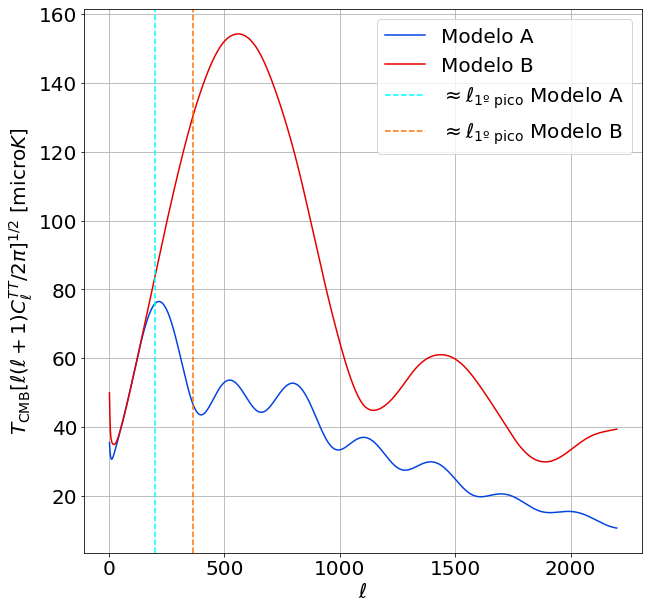

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a=np.loadtxt('modeloA.dat')
b=np.loadtxt('modeloB.dat')
c=np.loadtxt('try.dat')
a=pd.DataFrame(a, columns=['l', 'temp', 'nada', 'nada', 'nada', 'nada', 'nada', 'nada', 'nada', 'nada'])
b=pd.DataFrame(b, columns=['l', 'temp', 'nada', 'nada', 'nada', 'nada', 'nada', 'nada', 'nada', 'nada'])
c=pd.DataFrame(c, columns=['l', 'temp', 'nada', 'nada', 'nada', 'nada', 'nada', 'nada', 'nada', 'nada'])
l=np.array(a['l'])
ta=np.array(np.sqrt(a['temp']))
tb=np.array(np.sqrt(b['temp']))
tc=np.array(np.sqrt(c['temp']))

fig=plt.figure(figsize=[10,10])
plt.plot(l,ta, label='Modelo A', color='xkcd:blue')
plt.plot(l,tb, label='Modelo B', color='xkcd:red')
plt.axvline(200/np.sqrt(0.3+0.7), label=r'$\approx \ell_{\text{1º pico}}$ Modelo A', color='xkcd:cyan',ls='--')
plt.axvline(200/np.sqrt(0.3), label=r'$\approx \ell_{\text{1º pico}}$ Modelo B', color='xkcd:orange',ls='--')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel(r'$\ell$', size=20)
plt.ylabel(r'$T_\text{CMB}[\ell(\ell+1)C_\ell^{TT}/2\pi]^{1/2}\,\,[\text{micro}K]$', size=20)
plt.legend(fontsize=20)
plt.grid()
plt.savefig('camb.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')



# Questão 7

In [ ]:
from scipy.integrate import quad
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt

# Velocidade do som
h=0.6
H_0=100*h/3.086e19 #em segundos na menos 1
tcmb=2.725
omega_b=0.2
omega_rad=(32*sc.pi*sc.G*sc.sigma*(tcmb**4))/(3*((H_0)**2)*(sc.c**3))
omega_m=1


def razao(z): 
    primeiro_termo=(3*(sc.c**3))/(32*sc.pi*sc.G*sc.sigma)
    segundo_termo=(h**2)/tcmb**4
    return primeiro_termo*segundo_termo/(1+z)
print(razao(0))


def distancia_comovel_int_som(z):
    materia=omega_m*((1+z)**3)
    radiacao=omega_rad*((1+z)**4)
    Ez=np.sqrt(materia+radiacao)

    rho_critico=(3*(H_0**2))/(8*sc.pi*sc.G)
    rho_barion=rho_critico*omega_b
    rho_gamma=4*(sc.sigma/(sc.c**3))*(tcmb**4)
    razao=rho_barion/(rho_gamma*(1+z))
    somquadrado=(1/3)*(sc.c**2)*((1+(3/4)*razao))**(-1)
    return (np.sqrt(somquadrado)/Ez)

# Redshift do último espalhamento:
b1 = 0.313 * (omega_m*(h**2))**(-0.419) * (1 + 0.607 * (omega_m*(h**2))**0.674)
b2 = 0.238 * (omega_m*(h**2))**0.223
numerador = 1291 * (omega_m*(h**2))**0.251
denominador = 1 + 0.659 * (omega_m*(h**2))**0.828
bracket= 1 + b1 * (omega_b*(h**2))**b2
zd = (numerador / denominador) * bracket

distancia_comovel=(1/H_0)*quad(distancia_comovel_int_som, zd, np.inf)[0] #em metros
distancia_horizonte=distancia_comovel/3.086e22 #Em Mpc
print(f"A distância horizonte da BAO é {distancia_horizonte:.3f} Mpc")





1.3870832473056484e+39
A distância horizonte da BAO é 103.831 Mpc


# Questão 8

/tmp/ipykernel_4934/2095165865.py:39: RuntimeWarning: invalid value encountered in divide
  razao=m_gas/massa_total(rs_m)


[0.0, 1.8960030976586016e+33, 1.5167979988407746e+34, 5.119168050333853e+34, 1.2134240656030343e+35, 2.369947882341975e+35, 4.0952255985951685e+35, 6.502983361759483e+35, 9.706933885277438e+35, 1.3820774211276256e+36, 1.895818347395954e+36, 2.5232820663859077e+36, 3.275832239305385e+36, 4.1648300661463536e+36, 5.2016340624323745e+36, 6.397599836094923e+36, 7.764079864489324e+36, 9.312423271560846e+36, 1.1053975605171651e+37, 1.3000078614599349e+37, 1.516207002821757e+37, 1.7551283331369452e+37, 2.0179047544444348e+37, 2.305668700116852e+37, 2.619552112712043e+37, 2.9606864218480867e+37, 3.330202522102888e+37, 3.729230750939357e+37, 4.1589008666572476e+37, 4.620342026372697e+37, 5.11468276402651e+37, 5.643050968422215e+37, 6.206573861294948e+37, 6.806377975412185e+37, 7.443589132707349e+37, 8.119332422447367e+37, 8.834732179435139e+37, 9.590911962247962e+37, 1.0388994531512983e+38, 1.123010182822058e+38, 1.211535495207684e+38, 1.304587413989603e+38, 1.402277874403402e+38, 1.504718721086

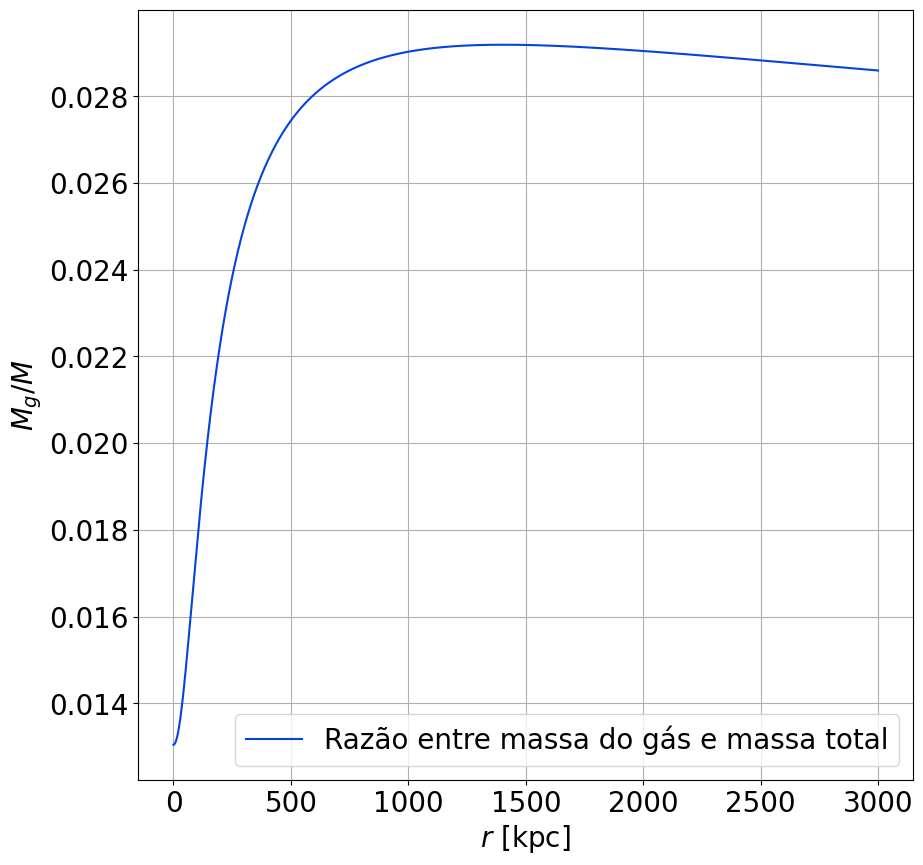

In [11]:
from scipy.integrate import quad
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt



# Letra a:

#Parâmetros
beta=0.7
tx=6#kev
rc=80#kpc
n0=8e-3#cm^3

#Parâmetros em SI:
tx_K=11.606e6*tx #Kelvin
rc_m=80*3.086e19
n0_mcube=n0*1e6 #m^-3
mu=0.6
mu_e=1.151

rs=np.arange(0, 3000, 0.1)
rs_m=rs*3.086e19

def massa_total(r):
    constantes=(-sc.k*tx_K)/(sc.G*sc.m_p*mu)
    beta_model_derivado=-3*beta*((r/rc_m)**2)*((1 +(r/rc_m)**2)**(-1))
    return constantes*r*beta_model_derivado

def massa_gas(r):
    constantes=mu_e*4*sc.pi*sc.m_p*n0_mcube
    def integrando (r_linha): return (r_linha**2)*(1+(r_linha/rc_m)**2)**(-3*beta/2)
    integral=quad(integrando, 0, r)[0]
    return constantes*integral


m_gas= [massa_gas(i) for i in rs_m]
razao=m_gas/massa_total(rs_m)

print(m_gas)

fig=plt.figure(figsize=[10,10])
plt.plot(rs,razao, label='Razão entre massa do gás e massa total', color='xkcd:blue')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel(r'$r$ [kpc]', size=20)
plt.ylabel(r'$M_g/M$', size=20)
plt.legend(fontsize=20)
plt.grid()
plt.savefig('razao.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')


# Letra b:
H_0=70/3.086e19
omega_m=0.3
tx=6
tx_K=11.606e6*tx #Kelvin
rho_critico=(3*(H_0**2))/(8*sc.pi*sc.G)
n=500

constantes_massa_total=(3*beta*sc.k*tx_K)/(sc.G*sc.m_p*mu)# \times (r**3)/r**2 +rc**2
rho_medio=constantes_massa_total/((4/3)*sc.pi)# \times (1/(r**2 +rc**2))
r_n_quadrado=rho_medio/(500*rho_critico) - (rc_m)**2
r_n=np.sqrt(r_n_quadrado)
print(f"O R_",n,"desse aglomerado é",r_n/3.086e19, "kpc")
m_n=(4/3)*sc.pi*(r_n**3)*(n*rho_critico)
print(f"O M_",n,"desse aglomerado é",m_n/1.989e30, "massa solares")

# Letra c:
tx_K=1.16045e7*tx #Kelvin
t8=tx_K/1e8 #adimensional
n0=8e-3#cm^3
H_0=70/3.086e19 #s^-1
H0_anos=H_0*3.154e7 #anos^-1
rc=80
beta=0.7

termo = 2.73e7 * np.sqrt(t8) * H0_anos / n0 
expoente=(-2)/(3*beta)
r_resf_quadrado=(rc**2)*(termo**expoente -1)
r_resf=np.sqrt(r_resf_quadrado)/1000
print(f"O raio de resfriamento desse aglomerado é",r_resf, "Mpc")

# tempo de resfriamento central: r=rc na formula do t_cf, logo:
t_central= 2.73e7 * np.sqrt(t8) / (n0*(2**(-3*beta/2))) 
print(f"O tempo de resfriamento central desse aglomerado é",t_central/1e9, "Giganos")

